## Hastalık Tanımı
Diyabet, hastalarda bazı göz bozukluklarına zemin hazırlar. Örneğin göz tansiyonu (glokom) ve katarakt (göz merceğinin bulanıklaşması) şeker hastalarında normalden iki kat fazla görülmektedir. Fakat en önemli göz bozukluğu diyabete bağlı retinopati’dir. Diyabete bağlı retinopati (Diyabetik retinopati = Kısaca DR), tüm dünyada görme kaybı yapan nedenlerin başında gelmektedir. 
 
Normal (N)(Normal),

Diabetes (D)(Diyabet),

Glaucoma (G)(Glokom ),

Cataract (C)(Katarakt)

"N":0,"C":1,"D":2,"G":3


## Google Colab Kimlik Doğrulama Adımı

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Kütüphanelerin kullanılmak üzere içeri aktarılması

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
from collections import Counter

import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,AveragePooling2D
from keras.layers import Input, Add,Activation, BatchNormalization
from tensorflow.keras.utils import plot_model

# Verinin Yüklenmesi

In [3]:
filepath = r"/gdrive/My Drive/Bitirme_2/OnIslenmisDataSetleri_2/"

def data_load(method_name):
  global filepath
  
  X_train_oversampling = np.load(filepath+"X_train_{}.npy".format(method_name))
  y_train_oversampling= np.load(filepath+"y_train_{}.npy".format(method_name))
  
  X_test = np.load(filepath+"X_test.npy")
  y_test = np.load(filepath+"y_test.npy")

  return X_train_oversampling,y_train_oversampling,X_test,y_test


In [4]:
X_train_oversampling,y_train_oversampling,X_test,y_test = data_load("smote")

In [5]:
print(X_train_oversampling.shape)
print(y_train_oversampling.shape)

print(X_test.shape)
print(y_test.shape)

(2560, 224, 224, 3)
(2560, 4)
(426, 224, 224, 3)
(426, 4)


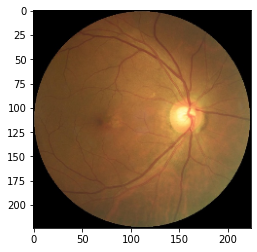

In [6]:
import matplotlib.pyplot as plt
image=X_train_oversampling[1]
plt.imshow(image)
plt.show()

In [7]:
y_train_oversampling

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [8]:
class_size = 4

# MODEL OLUŞTURMA

In [ ]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import import_ipynb

In [ ]:
os.chdir("/gdrive/My Drive/Bitirme_2/")

In [ ]:
!ls

1.smote_VeriOnIsleme_DiyabeteBagliGözHastaliklariTespiti.ipynb
2_smote_DiyabeteBagliGözHastaliklariTespiti.ipynb
EgitilmisModeller_2
GetModel.ipynb
ModelGecmisleri_2
OnIslenmisDataSetleri_2


In [ ]:
from GetModel import *

importing Jupyter notebook from GetModel.ipynb


In [ ]:
# ---- Alexnet -----
def get_Alexnet_model():
    global class_size
    return AlexNet(class_size)

def get_Alexnet_model2():
    global class_size
    return AlexNet2(class_size)
"""
# ---- ResNet50 -----

def get_ResNet50_model3():
  global class_size
  return ResNet50_model3(class_size)

# ----- VGG16 ------

def get_VGG16():
  global class_size
  return VGG16(class_size)
"""

'\n# ---- ResNet50 -----\n\ndef get_ResNet50_model3():\n  global class_size\n  return ResNet50_model3(class_size)\n\n# ----- VGG16 ------\n\ndef get_VGG16():\n  global class_size\n  return VGG16(class_size)\n'

# Eğitilen Modelin Kaydedilmesi ve Geri Yüklenmesi

In [9]:
import keras

In [10]:
def model_save(model,model_name):
    filepath = r"/gdrive/My Drive/Bitirme_2/EgitilmisModeller_2/{}.h5".format(model_name)
    model.save(filepath) 

def model_load(model_name):
  filepath = r"/gdrive/My Drive/Bitirme_2/EgitilmisModeller_2/{}.h5".format(model_name)
  return keras.models.load_model(filepath)

# Model eğitim geçmişindeki (acc-loss) değerlerini grafik ile çizdirilmesi

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns  #Seaborn, güzel görünen ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.

def history_summary(hist):
    sns.set() #default 
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()

# Model eğitim geçmişinin csv olarak kaydedilmesi ve geri yüklenmesi

In [12]:
import pandas as pd
# histroy nin kaydedilmesi
def history_save(history_name,history):
  name = "/gdrive/My Drive/Bitirme_2/ModelGecmisleri_2/{}".format(history_name)
  hist_df = pd.DataFrame(history.history) 
  hist_df.to_csv(name+'.csv',index = False)
  
def history_load(history_name):
  history=pd.read_csv("/gdrive/My Drive/Bitirme_2/ModelGecmisleri_2/{}.csv".format(history_name))
  return history


# Eğitilen Modelin test verisi için classification_report  ve confusion_matrix in çizdirilmesi


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_and_classification_report(model):
  global X_test,y_test
  y_pred = model.predict(X_test, verbose=1)
  y_pred = np.argmax(y_pred, axis=1)
  target_names = ['Normal','Katarakt','D.Retinopati','Glokom']
  print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

  cf_matrix = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
  print(cf_matrix,"\n")
  ax = sns.heatmap(cf_matrix, annot=True,fmt="d", cmap='Blues')
  ax.set_title('Confusion Matrix');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actal Values');
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(target_names)
  ax.yaxis.set_ticklabels(target_names)
  ## Display the visualization of the Confusion Matrix.
  plt.show()

# YSA Modelinin Derlenmesi ve Eğitilmesi

optimizer: ağırlık katsayılarının güncellenmesi için kullanılacak optimizasyon yöntemi

loss ; başarıya giderken geriye giderken hesaplama için

metrics başarı metriği olarak accuracy kullanıldı

In [14]:
from tensorflow.keras import optimizers

## AlexNet modellinin farklı parametrelerle eğitilmesi

### 1- AlexNet - SGD

In [ ]:
alexnet_1 = get_Alexnet_model2()
# categorical_crossentropy 
alexnet_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

alexNet_1_history = alexnet_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
64/64 [==============================] - 16s 44ms/step - loss: 1.3406 - accuracy: 0.3433 - val_loss: 1.4450 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 2s 35ms/step - loss: 1.2493 - accuracy: 0.4277 - val_loss: 1.5698 - val_accuracy: 0.0000e+00
Epoch 3/20
64/64 [==============================] - 2s 34ms/step - loss: 1.1855 - accuracy: 0.4785 - val_loss: 1.7956 - val_accuracy: 0.0000e+00
Epoch 4/20
64/64 [==============================] - 2s 34ms/step - loss: 1.1447 - accuracy: 0.5137 - val_loss: 1.9313 - val_accuracy: 0.0000e+00
Epoch 5/20
64/64 [==============================] - 2s 34ms/step - loss: 1.1030 - accuracy: 0.5273 - val_loss: 2.1439 - val_accuracy: 0.0000e+00
Epoch 6/20
64/64 [==============================] - 2s 34ms/step - loss: 1.0598 - accuracy: 0.5566 - val_loss: 1.9586 - val_accuracy: 0.0488
Epoch 7/20
64/64 [==============================] - 2s 34ms/step - loss: 1.0290 - accuracy: 0.5620 - val_loss: 2.1604 - val_accuracy:

In [ ]:
# Değerlendirme
loss_1,accuracy_1 = alexnet_1.evaluate(X_test,y_test)

14/14 [==============================] - 1s 30ms/step - loss: 1.2739 - accuracy: 0.4671


In [ ]:
history_save("alexNet_1_history",alexNet_1_history)
model_save(alexnet_1,"alexnet_1_224_224_3")

14/14 [==============================] - 10s 26ms/step
              precision    recall  f1-score   support

      Normal       0.62      0.13      0.22       160
    Katarakt       0.39      1.00      0.56       111
D.Retinopati       0.33      0.03      0.05        35
      Glokom       0.65      0.55      0.59       120

    accuracy                           0.47       426
   macro avg       0.50      0.43      0.36       426
weighted avg       0.54      0.47      0.40       426

[[ 21 107   0  32]
 [  0 111   0   0]
 [  8  22   1   4]
 [  5  47   2  66]] 



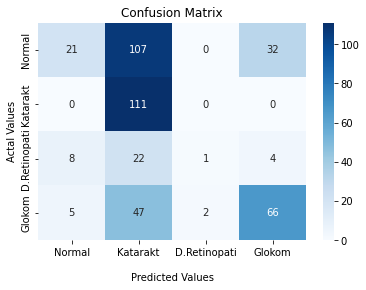

In [15]:
alexnet_1 = model_load("alexnet_1_224_224_3")
confusion_matrix_and_classification_report(alexnet_1)

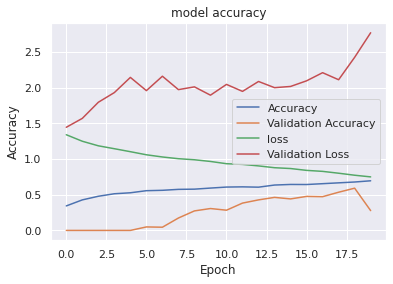

In [ ]:
history_summary(alexNet_1_history)

In [ ]:
h=history_load("alexNet_1_history")

In [ ]:
h.head()

,loss,accuracy,val_loss,val_accuracy
0,1.340645,0.343262,1.444993,0.0
1,1.249339,0.427734,1.569807,0.0
2,1.185493,0.478516,1.795551,0.0
3,1.144724,0.513672,1.931263,0.0
4,1.103044,0.527344,2.143919,0.0


### 2 - AlexNet - rmsprop

In [ ]:
alexnet_2 = get_Alexnet_model2()

alexnet_2.compile(optimizer = optimizers.RMSprop(),#learning_rate=0.001
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

alexNet_2_history = alexnet_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 4s 46ms/step - loss: 3.7701 - accuracy: 0.3428 - val_loss: 1.6844 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 3s 41ms/step - loss: 1.4062 - accuracy: 0.3281 - val_loss: 2.5942 - val_accuracy: 0.0000e+00
Epoch 3/20
64/64 [==============================] - 3s 41ms/step - loss: 1.4127 - accuracy: 0.3154 - val_loss: 1.5897 - val_accuracy: 0.0000e+00
Epoch 4/20
64/64 [==============================] - 3s 39ms/step - loss: 1.3376 - accuracy: 0.3223 - val_loss: 1.9588 - val_accuracy: 0.2715
Epoch 5/20
64/64 [==============================] - 3s 40ms/step - loss: 1.3692 - accuracy: 0.3496 - val_loss: 2.2251 - val_accuracy: 0.0137
Epoch 6/20
64/64 [==============================] - 4s 62ms/step - loss: 1.3057 - accuracy: 0.4116 - val_loss: 2.0451 - val_accuracy: 0.0723
Epoch 7/20
64/64 [==============================] - 3s 47ms/step - loss: 1.2459 - accuracy: 0.4580 - val_loss: 2.5263 - val_accuracy: 0.0273
E

In [ ]:
loss_2,accuracy_2 = alexnet_2.evaluate(X_test,y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.8888 - accuracy: 0.6221


In [ ]:
history_save("alexNet_2_history",alexNet_2_history)
model_save(alexnet_2,"alexnet_2_224_224_3")

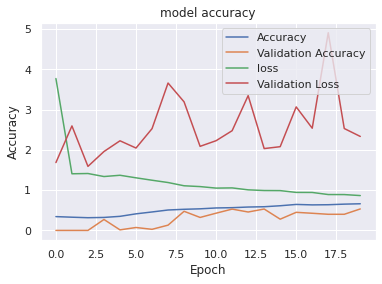

In [ ]:
history_summary(alexNet_2_history)

14/14 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

      Normal       0.60      0.46      0.52       160
    Katarakt       0.66      0.88      0.75       111
D.Retinopati       0.60      0.26      0.36        35
      Glokom       0.61      0.71      0.65       120

    accuracy                           0.62       426
   macro avg       0.62      0.58      0.57       426
weighted avg       0.62      0.62      0.60       426

[[73 38  5 44]
 [12 98  0  1]
 [13  3  9 10]
 [24 10  1 85]] 



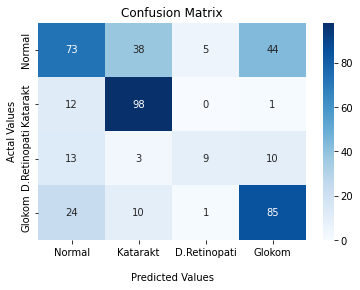

In [16]:
alexnet_2 = model_load("alexnet_2_224_224_3")
confusion_matrix_and_classification_report(alexnet_2)

### 3 - AlexNet - Adam

In [ ]:
alexnet_3 = get_Alexnet_model2()

alexnet_3.compile(optimizer = optimizers.Adam(),#learning_rate=0.001
                loss='categorical_crossentropy',
                metrics=['accuracy'])

alexNet_3_history = alexnet_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 4s 50ms/step - loss: 1.4225 - accuracy: 0.3354 - val_loss: 1.5794 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 2s 38ms/step - loss: 1.2819 - accuracy: 0.4209 - val_loss: 1.7718 - val_accuracy: 0.0352
Epoch 3/20
64/64 [==============================] - 2s 36ms/step - loss: 1.2432 - accuracy: 0.4224 - val_loss: 2.1273 - val_accuracy: 0.0332
Epoch 4/20
64/64 [==============================] - 2s 36ms/step - loss: 1.2687 - accuracy: 0.4258 - val_loss: 1.5866 - val_accuracy: 0.4551
Epoch 5/20
64/64 [==============================] - 2s 36ms/step - loss: 1.2102 - accuracy: 0.4424 - val_loss: 1.5528 - val_accuracy: 0.2090
Epoch 6/20
64/64 [==============================] - 2s 36ms/step - loss: 1.2335 - accuracy: 0.4443 - val_loss: 1.7778 - val_accuracy: 0.1895
Epoch 7/20
64/64 [==============================] - 2s 38ms/step - loss: 1.2007 - accuracy: 0.4893 - val_loss: 1.5171 - val_accuracy: 0.2031
Epoch 8/2

In [ ]:
loss_3,accuracy_3 = alexnet_3.evaluate(X_test,y_test)

14/14 [==============================] - 0s 15ms/step - loss: 1.0616 - accuracy: 0.5657


In [ ]:
history_save("alexNet_3_history",alexNet_3_history)
model_save(alexnet_3,"alexnet_3_224_224_3")

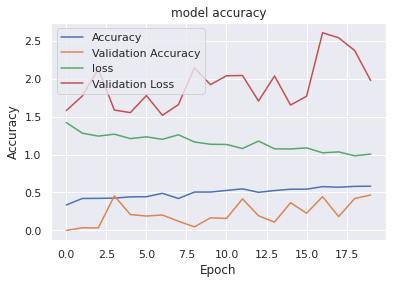

In [ ]:
history_summary(alexNet_3_history)

14/14 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.50      0.61      0.55       160
    Katarakt       0.66      0.70      0.68       111
D.Retinopati       0.15      0.06      0.08        35
      Glokom       0.63      0.53      0.57       120

    accuracy                           0.57       426
   macro avg       0.49      0.47      0.47       426
weighted avg       0.55      0.57      0.55       426

[[98 25  6 31]
 [30 78  2  1]
 [22  6  2  5]
 [45  9  3 63]] 



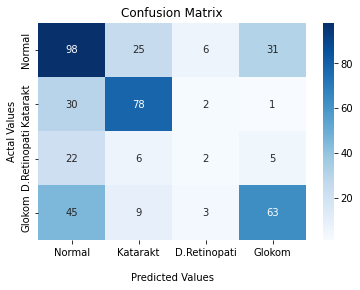

In [17]:
alexnet_3 = model_load("alexnet_3_224_224_3")
confusion_matrix_and_classification_report(alexnet_3)

### 4 - AlexNet - Adadelta

In [ ]:
alexnet_5 = get_Alexnet_model2()

alexnet_5.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adadelta(),
              metrics=['accuracy'])

alexNet_5_history = alexnet_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 4s 47ms/step - loss: 1.3810 - accuracy: 0.2969 - val_loss: 1.3975 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 3s 41ms/step - loss: 1.3626 - accuracy: 0.3330 - val_loss: 1.4211 - val_accuracy: 0.0000e+00
Epoch 3/20
64/64 [==============================] - 3s 41ms/step - loss: 1.3479 - accuracy: 0.3560 - val_loss: 1.4526 - val_accuracy: 0.0000e+00
Epoch 4/20
64/64 [==============================] - 2s 39ms/step - loss: 1.3271 - accuracy: 0.3721 - val_loss: 1.4901 - val_accuracy: 0.0000e+00
Epoch 5/20
64/64 [==============================] - 2s 37ms/step - loss: 1.3192 - accuracy: 0.3872 - val_loss: 1.5216 - val_accuracy: 0.0000e+00
Epoch 6/20
64/64 [==============================] - 2s 37ms/step - loss: 1.2968 - accuracy: 0.4165 - val_loss: 1.5432 - val_accuracy: 0.0000e+00
Epoch 7/20
64/64 [==============================] - 3s 39ms/step - loss: 1.2845 - accuracy: 0.4351 - val_loss: 1.5484 - val_accura

In [ ]:
loss_5,accuracy_5 = alexnet_5.evaluate(X_test,y_test)

14/14 [==============================] - 0s 15ms/step - loss: 1.1289 - accuracy: 0.5399


In [ ]:
history_save("alexNet_5_history",alexNet_5_history)
model_save(alexnet_5,"alexnet_5_224_224_3")

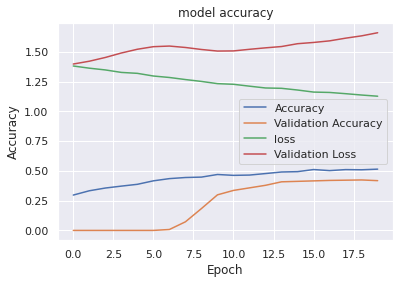

In [ ]:
history_summary(alexNet_5_history)

14/14 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.51      0.66      0.58       160
    Katarakt       0.56      0.65      0.60       111
D.Retinopati       0.50      0.03      0.05        35
      Glokom       0.57      0.43      0.49       120

    accuracy                           0.54       426
   macro avg       0.54      0.44      0.43       426
weighted avg       0.54      0.54      0.52       426

[[105  28   0  27]
 [ 28  72   0  11]
 [ 27   5   1   2]
 [ 44  23   1  52]] 



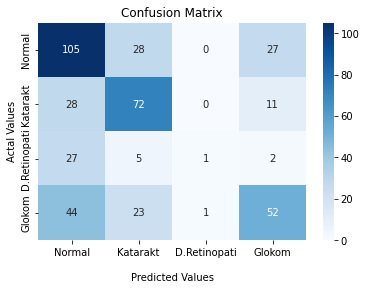

In [18]:
alexnet_5 = model_load("alexnet_5_224_224_3")
confusion_matrix_and_classification_report(alexnet_5)

### 5 - AlexNet - Adagrad

In [ ]:
alexnet_6 = get_Alexnet_model2()

alexnet_6.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adagrad(),
              metrics=['accuracy'])

alexNet_6_history = alexnet_6.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20 ,
                                  validation_split=0.20)

Epoch 1/20
64/64 [==============================] - 3s 43ms/step - loss: 1.3350 - accuracy: 0.3535 - val_loss: 1.4371 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 2s 37ms/step - loss: 1.2533 - accuracy: 0.4336 - val_loss: 1.5560 - val_accuracy: 0.0000e+00
Epoch 3/20
64/64 [==============================] - 2s 39ms/step - loss: 1.1912 - accuracy: 0.4722 - val_loss: 1.7644 - val_accuracy: 0.0000e+00
Epoch 4/20
64/64 [==============================] - 2s 36ms/step - loss: 1.1338 - accuracy: 0.5059 - val_loss: 1.9653 - val_accuracy: 0.0000e+00
Epoch 5/20
64/64 [==============================] - 2s 37ms/step - loss: 1.0942 - accuracy: 0.5303 - val_loss: 2.0003 - val_accuracy: 0.0000e+00
Epoch 6/20
64/64 [==============================] - 2s 37ms/step - loss: 1.0584 - accuracy: 0.5513 - val_loss: 1.9133 - val_accuracy: 0.0664
Epoch 7/20
64/64 [==============================] - 2s 35ms/step - loss: 1.0504 - accuracy: 0.5591 - val_loss: 2.0213 - val_accuracy: 

In [ ]:
loss_6,accuracy_6 = alexnet_6.evaluate(X_test,y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.9516 - accuracy: 0.6009


In [ ]:
history_save("alexNet_6_history",alexNet_6_history)
model_save(alexnet_6,"alexnet_6_224_224_3")

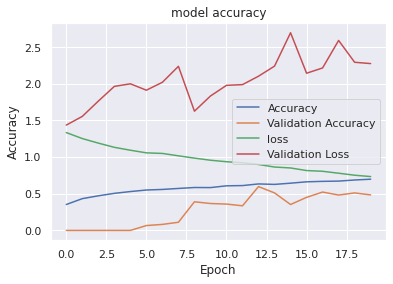

In [ ]:
history_summary(alexNet_6_history)

14/14 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.74      0.35      0.47       160
    Katarakt       0.62      0.96      0.75       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.53      0.78      0.63       120

    accuracy                           0.60       426
   macro avg       0.47      0.52      0.46       426
weighted avg       0.59      0.60      0.55       426

[[ 56  37   0  67]
 [  1 107   0   3]
 [ 11  10   0  14]
 [  8  19   0  93]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


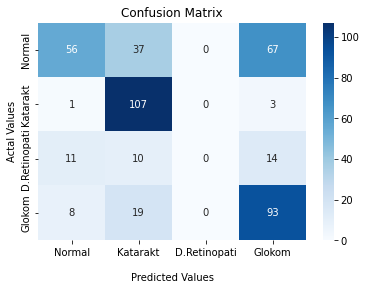

In [19]:
alexnet_6 = model_load("alexnet_6_224_224_3")
confusion_matrix_and_classification_report(alexnet_6)

## ResNet50  modellinin farklı parametrelerle eğitilmesi

224,224,3

In [ ]:
from tensorflow.keras.applications import ResNet50
def resnet50():
  global class_size
  base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
  for layer in base_model.layers:
    layer.trainable = False
  
  model = Sequential()
  model.add(base_model)
  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(class_size, activation='softmax'))
  return model

###1 - ResNet50 - SGD



In [ ]:
resnet_1 = resnet50()

resnet_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

resnet_1_history = resnet_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

94781440/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
64/64 [==============================] - 14s 170ms/step - loss: 2.1569 - accuracy: 0.2925 - val_loss: 1.6986 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 8s 133ms/step - loss: 1.3508 - accuracy: 0.3228 - val_loss: 1.7420 - val_accuracy: 0.3418
Epoch 3/20
64/64 [==============================] - 9s 133ms/step - loss: 1.3419 - accuracy: 0.3242 - val_loss: 1.8240 - val_accuracy: 0.0000e+00
Epoch 4/20
64/64 [==============================] - 8s 133ms/step - loss: 1.3366 - accuracy: 0.3296 - val_loss: 1.7196 - val_accuracy: 0.0000e+00
Epoch 5/20
64/64 [==============================] - 8s 133ms/step - loss: 1.3264 - accuracy: 0.3462 - val_loss: 1.7075 - val_accuracy: 0.0000e+00
Epoch 6/20
64/64 [==============================] - 10s 150ms/step - loss: 1.3246 - accuracy: 0.3467 - val_loss: 1.5827 - val_accuracy: 0.0254
Epoch 7/20
64/64 [==============================] - 9s 133ms/step - loss: 1.3135 - accuracy: 0.3555 - val_loss: 1.8848 - val_accur

In [ ]:
loss_7,accuracy_7 = resnet_1.evaluate(X_test,y_test)

14/14 [==============================] - 3s 133ms/step - loss: 1.2696 - accuracy: 0.3662


In [ ]:
history_save("resnet_1_history",resnet_1_history)
model_save(resnet_1,"resnet_1_224_224_3")

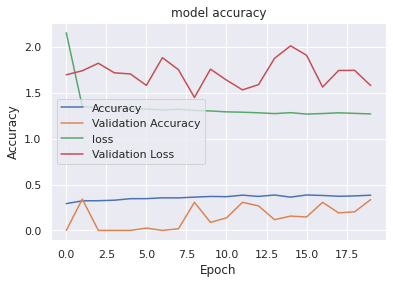

In [ ]:
history_summary(resnet_1_history)

14/14 [==============================] - 2s 92ms/step
              precision    recall  f1-score   support

      Normal       0.50      0.01      0.01       160
    Katarakt       0.35      0.76      0.48       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.40      0.59      0.47       120

    accuracy                           0.37       426
   macro avg       0.31      0.34      0.24       426
weighted avg       0.39      0.37      0.26       426

[[ 1 91  0 68]
 [ 0 84  0 27]
 [ 0 22  0 13]
 [ 1 44  4 71]] 



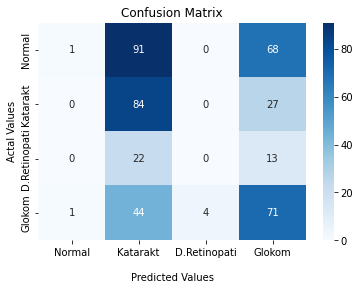

In [26]:
resnet_1 = model_load("resnet_1_224_224_3")
confusion_matrix_and_classification_report(resnet_1)

###2 - ResNet50 - rmsprop

In [ ]:
resnet_2 = resnet50()

resnet_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

resnet_2_history = resnet_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
64/64 [==============================] - 15s 186ms/step - loss: 36.4517 - accuracy: 0.2632 - val_loss: 19.6528 - val_accuracy: 0.0176
Epoch 2/20
64/64 [==============================] - 11s 170ms/step - loss: 17.7571 - accuracy: 0.2788 - val_loss: 11.6342 - val_accuracy: 0.2559
Epoch 3/20
64/64 [==============================] - 11s 173ms/step - loss: 13.0801 - accuracy: 0.3057 - val_loss: 19.0853 - val_accuracy: 0.1211
Epoch 4/20
64/64 [==============================] - 10s 155ms/step - loss: 10.1043 - accuracy: 0.3193 - val_loss: 10.1828 - val_accuracy: 0.1777
Epoch 5/20
64/64 [==============================] - 10s 154ms/step - loss: 7.6144 - accuracy: 0.3169 - val_loss: 6.1571 - val_accuracy: 0.5176
Epoch 6/20
64/64 [==============================] - 11s 171ms/step - loss: 5.5779 - accuracy: 0.3345 - val_loss: 11.0435 - val_accuracy: 0.0254
Epoch 7/20
64/64 [==============================] - 11s 172ms/step - loss: 4.1989 - accuracy: 0.3237 - val_loss: 2.9265 - val_accurac

In [ ]:
loss_8,accuracy_8 = resnet_2.evaluate(X_test,y_test)

14/14 [==============================] - 2s 97ms/step - loss: 1.5969 - accuracy: 0.1033


In [ ]:
history_save("resnet_2_history",resnet_2_history)
model_save(resnet_2,"resnet_2_224_224_3")

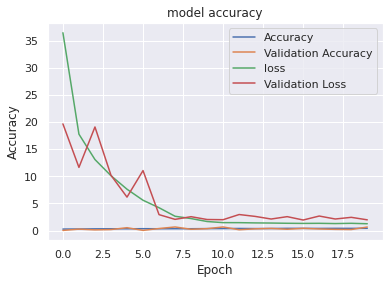

In [ ]:
history_summary(resnet_2_history)

14/14 [==============================] - 2s 91ms/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       160
    Katarakt       0.62      0.09      0.16       111
D.Retinopati       0.08      0.97      0.15        35
      Glokom       0.00      0.00      0.00       120

    accuracy                           0.10       426
   macro avg       0.18      0.27      0.08       426
weighted avg       0.17      0.10      0.05       426

[[  0   3 157   0]
 [  1  10  99   1]
 [  0   1  34   0]
 [  0   2 118   0]] 



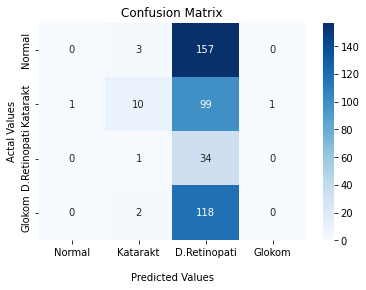

In [27]:
resnet_2 = model_load("resnet_2_224_224_3")
confusion_matrix_and_classification_report(resnet_2)

###3 - ResNet50 - adam

In [ ]:
resnet_3 = resnet50()

resnet_3.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

resnet_3_history = resnet_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
64/64 [==============================] - 14s 180ms/step - loss: 8.4897 - accuracy: 0.3096 - val_loss: 2.3611 - val_accuracy: 0.3691
Epoch 2/20
64/64 [==============================] - 10s 154ms/step - loss: 1.4680 - accuracy: 0.3701 - val_loss: 2.3004 - val_accuracy: 0.4785
Epoch 3/20
64/64 [==============================] - 9s 139ms/step - loss: 1.7143 - accuracy: 0.3745 - val_loss: 3.5699 - val_accuracy: 0.1523
Epoch 4/20
64/64 [==============================] - 9s 139ms/step - loss: 1.4273 - accuracy: 0.4019 - val_loss: 1.6527 - val_accuracy: 0.5195
Epoch 5/20
64/64 [==============================] - 10s 157ms/step - loss: 1.5980 - accuracy: 0.4028 - val_loss: 2.2472 - val_accuracy: 0.3926
Epoch 6/20
64/64 [==============================] - 9s 142ms/step - loss: 1.3766 - accuracy: 0.4185 - val_loss: 2.8293 - val_accuracy: 0.2168
Epoch 7/20
64/64 [==============================] - 10s 159ms/step - loss: 1.2526 - accuracy: 0.4507 - val_loss: 1.7706 - val_accuracy: 0.4980
Ep

In [ ]:
loss_9,accuracy_9 = resnet_3.evaluate(X_test,y_test)

14/14 [==============================] - 2s 96ms/step - loss: 1.3164 - accuracy: 0.3427


In [ ]:
history_save("resnet_3_history",resnet_3_history)
model_save(resnet_3,"resnet_3_224_224_3")

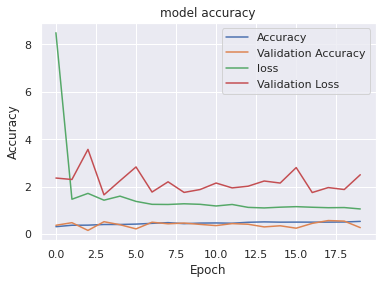

In [ ]:
history_summary(resnet_3_history)

14/14 [==============================] - 2s 92ms/step
              precision    recall  f1-score   support

      Normal       0.66      0.17      0.27       160
    Katarakt       0.30      1.00      0.46       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.89      0.07      0.12       120

    accuracy                           0.34       426
   macro avg       0.46      0.31      0.21       426
weighted avg       0.57      0.34      0.25       426

[[ 27 131   1   1]
 [  0 111   0   0]
 [  3  32   0   0]
 [ 11 101   0   8]] 



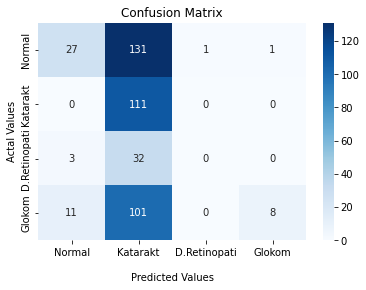

In [28]:
resnet_3 = model_load("resnet_3_224_224_3")
confusion_matrix_and_classification_report(resnet_3)

###4 - ResNet50- Adadelta


In [ ]:
resnet_4 = resnet50()

resnet_4.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adadelta(),
              metrics=['accuracy'])

resnet_4_history = resnet_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
64/64 [==============================] - 13s 160ms/step - loss: 1.3840 - accuracy: 0.2749 - val_loss: 1.7234 - val_accuracy: 0.0039
Epoch 2/20
64/64 [==============================] - 9s 142ms/step - loss: 1.3256 - accuracy: 0.3306 - val_loss: 1.5285 - val_accuracy: 0.1230
Epoch 3/20
64/64 [==============================] - 9s 143ms/step - loss: 1.3104 - accuracy: 0.3550 - val_loss: 1.7748 - val_accuracy: 0.0176
Epoch 4/20
64/64 [==============================] - 10s 160ms/step - loss: 1.2992 - accuracy: 0.3628 - val_loss: 1.7088 - val_accuracy: 0.0605
Epoch 5/20
64/64 [==============================] - 10s 161ms/step - loss: 1.2847 - accuracy: 0.3711 - val_loss: 1.5168 - val_accuracy: 0.1699
Epoch 6/20
64/64 [==============================] - 10s 162ms/step - loss: 1.2812 - accuracy: 0.3896 - val_loss: 1.6117 - val_accuracy: 0.1230
Epoch 7/20
64/64 [==============================] - 9s 146ms/step - loss: 1.2718 - accuracy: 0.3926 - val_loss: 1.4887 - val_accuracy: 0.3281
Ep

In [ ]:
loss_10,accuracy_10 = resnet_4.evaluate(X_test,y_test)

14/14 [==============================] - 2s 100ms/step - loss: 1.2341 - accuracy: 0.4014


In [ ]:
history_save("resnet_4_history",resnet_4_history)
model_save(resnet_4,"resnet_4_224_224_3")

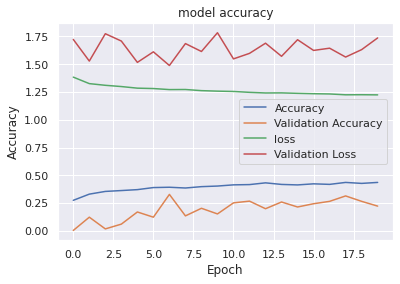

In [ ]:
history_summary(resnet_4_history)

14/14 [==============================] - 2s 92ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.39      0.91      0.55       160
    Katarakt       0.49      0.23      0.31       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.00      0.00      0.00       120

    accuracy                           0.40       426
   macro avg       0.22      0.28      0.21       426
weighted avg       0.27      0.40      0.29       426

[[146  14   0   0]
 [ 86  25   0   0]
 [ 32   3   0   0]
 [109   9   2   0]] 



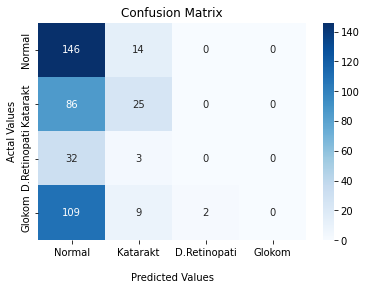

In [29]:
resnet_4 = model_load("resnet_4_224_224_3")
confusion_matrix_and_classification_report(resnet_4)

###5 - ResNet50 - Adagrad

In [ ]:
resnet_5 = resnet50()

resnet_5.compile(optimizer = optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

resnet_5_history = resnet_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/20
64/64 [==============================] - 22s 146ms/step - loss: 2.0861 - accuracy: 0.3228 - val_loss: 1.8979 - val_accuracy: 0.0000e+00
Epoch 2/20
64/64 [==============================] - 9s 147ms/step - loss: 1.3384 - accuracy: 0.3394 - val_loss: 1.6807 - val_accuracy: 0.0000e+00
Epoch 3/20
64/64 [==============================] - 8s 130ms/step - loss: 1.3270 - accuracy: 0.3359 - val_loss: 1.7873 - val_accuracy: 0.0000e+00
Epoch 4/20
64/64 [==============================] - 8s 130ms/step - loss: 1.3193 - accuracy: 0.3525 - val_loss: 1.6116 - val_accuracy: 0.0000e+00
Epoch 5/20
64/64 [==============================] - 9s 148ms/step - loss: 1.3101 - accuracy: 0.3623 - val_loss: 1.8327 - val_accuracy: 0.0000e+00
Epoch 6/20
64/64 [==============================] - 9s 147ms/step - loss: 1.3109 - accuracy: 0.3442 - val_loss: 1.6592 - val_accuracy: 0.0039
Epoch 7/20
64/64 [==============================] - 9s 148ms/s

In [ ]:
loss_11,accuracy_11 = resnet_5.evaluate(X_test,y_test)

14/14 [==============================] - 3s 130ms/step - loss: 1.2393 - accuracy: 0.4296


In [ ]:
history_save("resnet_5_history",resnet_5_history)
model_save(resnet_5,"resnet_5_224_224_3")

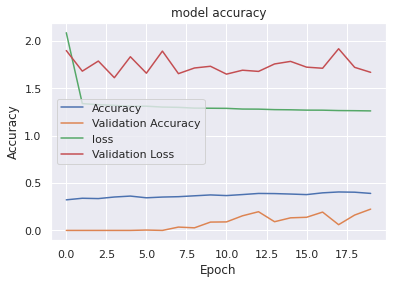

In [ ]:
history_summary(resnet_5_history)

14/14 [==============================] - 3s 118ms/step
              precision    recall  f1-score   support

      Normal       0.41      0.53      0.47       160
    Katarakt       0.44      0.40      0.42       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.45      0.45      0.45       120

    accuracy                           0.43       426
   macro avg       0.33      0.34      0.33       426
weighted avg       0.40      0.43      0.41       426

[[85 29  0 46]
 [53 44  0 14]
 [19  9  0  7]
 [48 18  0 54]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


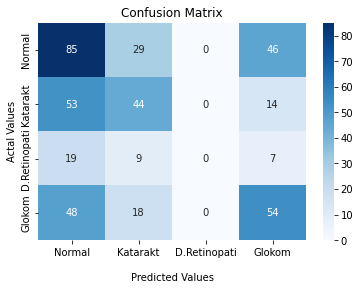

In [25]:
resnet_5 = model_load("resnet_5_224_224_3")
confusion_matrix_and_classification_report(resnet_5)

## VGG16 modellinin farklı parametrelerle eğitilmesi
 224,224,3

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
def vgg16():
  vgg = VGG16(weights="imagenet",include_top = False,input_shape=(224,224,3))
  global class_size
  for layer in vgg.layers:
    layer.trainable = False

  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(class_size,activation="sigmoid"))

  return model

### 1 - VGG16 - SGD

In [ ]:
vgg16_1 = vgg16()

vgg16_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

vgg16_1_history = vgg16_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
64/64 [==============================] - 14s 209ms/step - loss: 1.4619 - accuracy: 0.4043 - val_loss: 1.2690 - val_accuracy: 0.5586
Epoch 2/20
64/64 [==============================] - 13s 204ms/step - loss: 1.0477 - accuracy: 0.5820 - val_loss: 1.6429 - val_accuracy: 0.4473
Epoch 3/20
64/64 [==============================] - 16s 245ms/step - loss: 0.9436 - accuracy: 0.6235 - val_loss: 1.4864 - val_accuracy: 0.4355
Epoch 4/20
64/64 [==============================] - 13s 198ms/step - loss: 0.8970 - accuracy: 0.6494 - val_loss: 2.3000 - val_accuracy: 0.3672
Epoch 5/20
64/64 [==============================] - 12s 196ms/step - loss: 0.8393 - accuracy: 0.6636 - val_loss: 1.7140 - val_accuracy: 0.5508
Epoch 6/20
64/64 [==============================] - 13s 197ms/step - loss: 0.8226 - accuracy: 0.6855 - val_loss: 1.4205 - val_accuracy: 0.5078
Epoch 7/20
64/64 [==============================] - 13s 198ms/step - loss: 0.8168 - accuracy: 0.6792 - val_loss: 1.3847 - val_accuracy: 0.5430

In [ ]:
loss_12,accuracy_12 = vgg16_1.evaluate(X_test,y_test)

14/14 [==============================] - 2s 152ms/step - loss: 0.7695 - accuracy: 0.6901


In [ ]:
history_save("vgg16_1_history",vgg16_1_history)
model_save(vgg16_1,"vgg16_1_224_224_3")

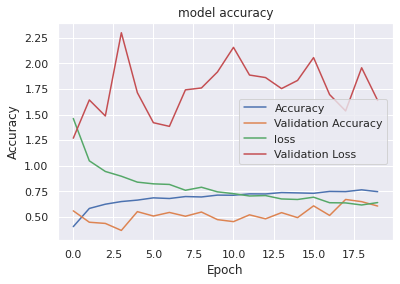

In [ ]:
history_summary(vgg16_1_history)

14/14 [==============================] - 6s 220ms/step
              precision    recall  f1-score   support

      Normal       0.84      0.47      0.61       160
    Katarakt       0.80      0.95      0.87       111
D.Retinopati       0.61      0.40      0.48        35
      Glokom       0.54      0.82      0.66       120

    accuracy                           0.69       426
   macro avg       0.70      0.66      0.65       426
weighted avg       0.73      0.69      0.68       426

[[ 76  11   7  66]
 [  1 105   0   5]
 [  6   3  14  12]
 [  7  12   2  99]] 



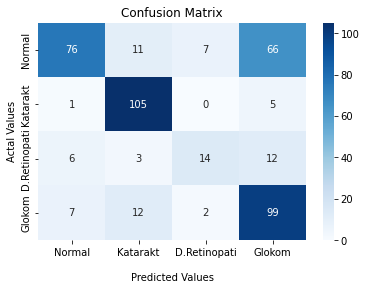

In [20]:
vgg16_1 = model_load("vgg16_1_224_224_3")
confusion_matrix_and_classification_report(vgg16_1)

### 2 - VGG16 -rmsprop

In [ ]:
vgg16_2 = vgg16()

vgg16_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_2_history = vgg16_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 14s 202ms/step - loss: 2.0834 - accuracy: 0.4834 - val_loss: 2.1155 - val_accuracy: 0.5664
Epoch 2/20
64/64 [==============================] - 13s 205ms/step - loss: 1.3187 - accuracy: 0.6084 - val_loss: 5.0127 - val_accuracy: 0.4746
Epoch 3/20
64/64 [==============================] - 16s 244ms/step - loss: 1.1682 - accuracy: 0.6445 - val_loss: 4.5601 - val_accuracy: 0.3203
Epoch 4/20
64/64 [==============================] - 13s 198ms/step - loss: 1.1068 - accuracy: 0.6792 - val_loss: 4.9512 - val_accuracy: 0.4941
Epoch 5/20
64/64 [==============================] - 13s 196ms/step - loss: 1.0474 - accuracy: 0.6836 - val_loss: 5.8510 - val_accuracy: 0.4824
Epoch 6/20
64/64 [==============================] - 13s 197ms/step - loss: 0.9208 - accuracy: 0.7217 - val_loss: 4.2281 - val_accuracy: 0.6562
Epoch 7/20
64/64 [==============================] - 13s 198ms/step - loss: 0.8524 - accuracy: 0.7319 - val_loss: 5.7608 - val_accuracy: 0.4629

In [ ]:
loss_13,accuracy_13 = vgg16_2.evaluate(X_test,y_test)

14/14 [==============================] - 2s 152ms/step - loss: 0.7349 - accuracy: 0.7512


In [ ]:
history_save("vgg16_2_history",vgg16_2_history)
model_save(vgg16_2,"vgg16_2_224_224_3")

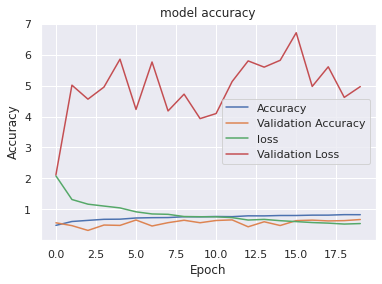

In [ ]:
history_summary(vgg16_2_history)

14/14 [==============================] - 2s 144ms/step
              precision    recall  f1-score   support

      Normal       0.38      1.00      0.55       160
    Katarakt       0.00      0.00      0.00       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.00      0.00      0.00       120

    accuracy                           0.38       426
   macro avg       0.09      0.25      0.14       426
weighted avg       0.14      0.38      0.21       426

[[160   0   0   0]
 [111   0   0   0]
 [ 35   0   0   0]
 [120   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


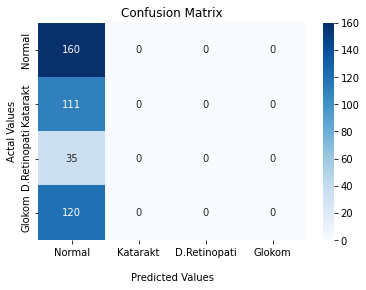

In [21]:
vgg16_2 = model_load("vgg16_2_224_224_3")
confusion_matrix_and_classification_report(vgg16_2)

### 3 - VGG16 -adam

In [ ]:
vgg16_3 = vgg16()

vgg16_3.compile(optimizer= 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_3_history = vgg16_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/20
64/64 [==============================] - 26s 193ms/step - loss: 1.1479 - accuracy: 0.5830 - val_loss: 2.3863 - val_accuracy: 0.4824
Epoch 2/20
64/64 [==============================] - 12s 183ms/step - loss: 0.6901 - accuracy: 0.7339 - val_loss: 2.3354 - val_accuracy: 0.4746
Epoch 3/20
64/64 [==============================] - 12s 186ms/step - loss: 0.5433 - accuracy: 0.7979 - val_loss: 2.7750 - val_accuracy: 0.5996
Epoch 4/20
64/64 [==============================] - 12s 189ms/step - loss: 0.5365 - accuracy: 0.7964 - val_loss: 2.6917 - val_accuracy: 0.5117
Epoch 5/20
64/64 [==============================] - 12s 194ms/step - loss: 0.4948 - accuracy: 0.8022 - val_loss: 3.4526 - val_accuracy: 0.6602
Epoch 6/20
64/64 [==============================] - 13s 197ms/step - loss: 0.4469 - accuracy: 0.8267 - val_loss: 2.9953 - val_accuracy: 0.6465
Epoch 7/20
64/64 [==============================] - 13s 201ms/step - loss: 0.

In [ ]:
loss_14,accuracy_14 = vgg16_3.evaluate(X_test,y_test)

14/14 [==============================] - 4s 243ms/step - loss: 0.4111 - accuracy: 0.8357


In [ ]:
history_save("vgg16_3_history",vgg16_3_history)
model_save(vgg16_3,"vgg16_3_224_224_3")

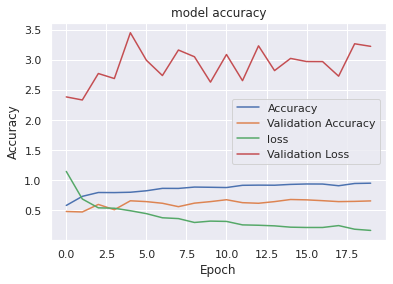

In [ ]:
history_summary(vgg16_3_history)

14/14 [==============================] - 2s 144ms/step
              precision    recall  f1-score   support

      Normal       0.91      0.71      0.80       160
    Katarakt       0.89      0.98      0.94       111
D.Retinopati       0.84      0.77      0.81        35
      Glokom       0.72      0.89      0.80       120

    accuracy                           0.84       426
   macro avg       0.84      0.84      0.83       426
weighted avg       0.85      0.84      0.83       426

[[113   8   3  36]
 [  1 109   0   1]
 [  3   1  27   4]
 [  7   4   2 107]] 



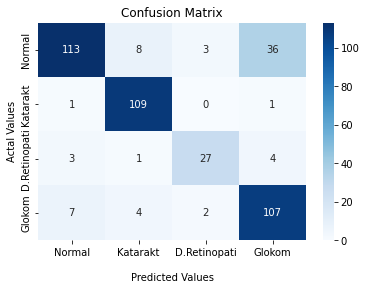

In [22]:
vgg16_3 = model_load("vgg16_3_224_224_3")
confusion_matrix_and_classification_report(vgg16_3)

### 4 - VGG16 -Adadelta

In [ ]:
vgg16_4 = vgg16()

vgg16_4.compile(optimizer= optimizers.Adadelta(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_4_history = vgg16_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 16s 246ms/step - loss: 1.9889 - accuracy: 0.1499 - val_loss: 0.9294 - val_accuracy: 0.6484
Epoch 2/20
64/64 [==============================] - 16s 244ms/step - loss: 1.7580 - accuracy: 0.1533 - val_loss: 1.0486 - val_accuracy: 0.6191
Epoch 3/20
64/64 [==============================] - 16s 243ms/step - loss: 1.5964 - accuracy: 0.1616 - val_loss: 1.1765 - val_accuracy: 0.5469
Epoch 4/20
64/64 [==============================] - 13s 198ms/step - loss: 1.4898 - accuracy: 0.1602 - val_loss: 1.2963 - val_accuracy: 0.4434
Epoch 5/20
64/64 [==============================] - 13s 197ms/step - loss: 1.4220 - accuracy: 0.1763 - val_loss: 1.3986 - val_accuracy: 0.3457
Epoch 6/20
64/64 [==============================] - 13s 198ms/step - loss: 1.3783 - accuracy: 0.2393 - val_loss: 1.4781 - val_accuracy: 0.2148
Epoch 7/20
64/64 [==============================] - 13s 199ms/step - loss: 1.3484 - accuracy: 0.3101 - val_loss: 1.5435 - val_accuracy: 0.1582

In [ ]:
loss_15,accuracy_15 = vgg16_4.evaluate(X_test,y_test)

14/14 [==============================] - 2s 150ms/step - loss: 1.2023 - accuracy: 0.5681


In [ ]:
history_save("vgg16_4_history",vgg16_4_history)
model_save(vgg16_4,"vgg16_4_224_224_3")

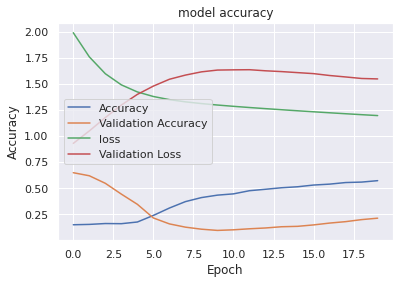

In [ ]:
history_summary(vgg16_4_history)

14/14 [==============================] - 2s 144ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.61      0.75      0.67       160
    Katarakt       0.52      0.95      0.67       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.65      0.14      0.23       120

    accuracy                           0.57       426
   macro avg       0.44      0.46      0.39       426
weighted avg       0.55      0.57      0.49       426

[[120  32   0   8]
 [  5 105   0   1]
 [ 20  15   0   0]
 [ 53  50   0  17]] 



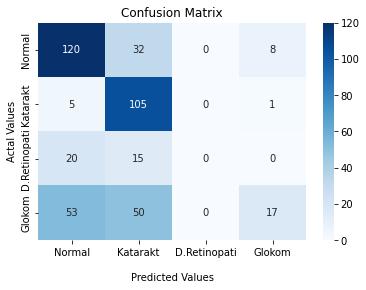

In [23]:
vgg16_4 = model_load("vgg16_4_224_224_3")
confusion_matrix_and_classification_report(vgg16_4)

### 5 - VGG16 - Adagrad

In [ ]:
vgg16_5 = vgg16()

vgg16_5.compile(optimizer= optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_5_history = vgg16_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 15s 221ms/step - loss: 1.1570 - accuracy: 0.5151 - val_loss: 1.5538 - val_accuracy: 0.3730
Epoch 2/20
64/64 [==============================] - 13s 204ms/step - loss: 0.9541 - accuracy: 0.6470 - val_loss: 1.3178 - val_accuracy: 0.5000
Epoch 3/20
64/64 [==============================] - 13s 202ms/step - loss: 0.8836 - accuracy: 0.6646 - val_loss: 1.4193 - val_accuracy: 0.4590
Epoch 4/20
64/64 [==============================] - 13s 197ms/step - loss: 0.8438 - accuracy: 0.6802 - val_loss: 1.4979 - val_accuracy: 0.4629
Epoch 5/20
64/64 [==============================] - 12s 195ms/step - loss: 0.8121 - accuracy: 0.6899 - val_loss: 1.4707 - val_accuracy: 0.4844
Epoch 6/20
64/64 [==============================] - 12s 196ms/step - loss: 0.7889 - accuracy: 0.6982 - val_loss: 1.4665 - val_accuracy: 0.4902
Epoch 7/20
64/64 [==============================] - 13s 198ms/step - loss: 0.7672 - accuracy: 0.7095 - val_loss: 1.5732 - val_accuracy: 0.4863

In [ ]:
loss_16,accuracy_16 = vgg16_5.evaluate(X_test,y_test)

14/14 [==============================] - 2s 152ms/step - loss: 0.7694 - accuracy: 0.6925


In [ ]:
history_save("vgg16_5_history",vgg16_5_history)
model_save(vgg16_5,"vgg16_5_224_224_3")

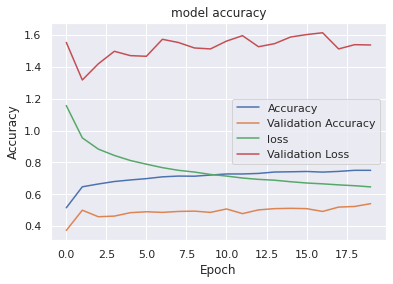

In [ ]:
history_summary(vgg16_5_history)

14/14 [==============================] - 2s 144ms/step
              precision    recall  f1-score   support

      Normal       0.75      0.65      0.70       160
    Katarakt       0.73      0.95      0.83       111
D.Retinopati       0.83      0.14      0.24        35
      Glokom       0.59      0.68      0.63       120

    accuracy                           0.69       426
   macro avg       0.73      0.60      0.60       426
weighted avg       0.71      0.69      0.67       426

[[104  15   1  40]
 [  3 105   0   3]
 [ 13   3   5  14]
 [ 19  20   0  81]] 



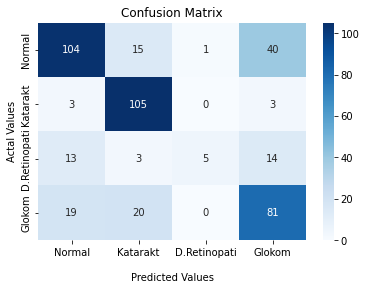

In [24]:
vgg16_5 = model_load("vgg16_5_224_224_3")
confusion_matrix_and_classification_report(vgg16_5)

## VGG19 modelinin farkl parametrelerle eğitilmesi

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
def vgg19():
  vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))
  for layer in vgg.layers:
    layer.trainable = False

  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(class_size,activation="sigmoid"))

  return model

### 1 - VGG19 - SGD

In [ ]:
vgg19_1 = vgg19()

vgg19_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

vgg19_1_history = vgg19_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
64/64 [==============================] - 18s 271ms/step - loss: 1.4144 - accuracy: 0.4033 - val_loss: 1.1860 - val_accuracy: 0.6055
Epoch 2/20
64/64 [==============================] - 15s 241ms/step - loss: 1.2043 - accuracy: 0.5254 - val_loss: 1.2134 - val_accuracy: 0.5488
Epoch 3/20
64/64 [==============================] - 15s 237ms/step - loss: 1.0590 - accuracy: 0.5742 - val_loss: 2.0820 - val_accuracy: 0.3281
Epoch 4/20
64/64 [==============================] - 15s 230ms/step - loss: 0.9344 - accuracy: 0.6255 - val_loss: 2.0485 - val_accuracy: 0.4707
Epoch 5/20
64/64 [==============================] - 17s 264ms/step - loss: 0.9514 - accuracy: 0.6260 - val_loss: 2.1176 - val_accuracy: 0.4121
Epoch 6/20
64/64 [==============================] - 15s 229ms/step - loss: 0.9283 - accuracy: 0.6221 - val_loss: 1.7362 - val_accuracy: 0.4355
Epoch 7/20
64/64 [==============================] - 17s 266ms/step - loss: 0.8429 - accuracy: 0.6660 - val_loss: 2.0407 - val_accuracy: 0.5977

In [ ]:
loss_13,accuracy_13 = vgg19_1.evaluate(X_test,y_test)

14/14 [==============================] - 3s 178ms/step - loss: 0.8216 - accuracy: 0.6549


In [ ]:
history_save("vgg19_1_history",vgg19_1_history)
model_save(vgg19_1,"vgg19_1_224_224_3")

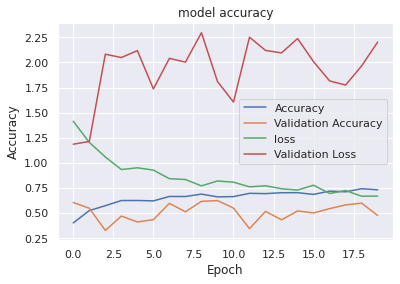

In [ ]:
history_summary(vgg19_1_history)

14/14 [==============================] - 2s 169ms/step
              precision    recall  f1-score   support

      Normal       0.56      0.88      0.68       160
    Katarakt       0.79      0.89      0.84       111
D.Retinopati       0.50      0.03      0.05        35
      Glokom       0.80      0.33      0.46       120

    accuracy                           0.65       426
   macro avg       0.66      0.53      0.51       426
weighted avg       0.68      0.65      0.61       426

[[140  11   0   9]
 [ 12  99   0   0]
 [ 32   1   1   1]
 [ 65  15   1  39]] 



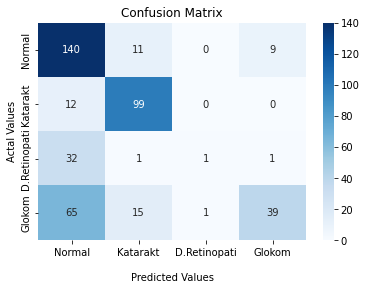

In [30]:
vgg19_1 = model_load("vgg19_1_224_224_3")
confusion_matrix_and_classification_report(vgg19_1)

### 2 - VGG19 - rmsprop

In [ ]:
vgg19_2 = vgg19()

vgg19_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_2_history = vgg19_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 16s 237ms/step - loss: 2.5450 - accuracy: 0.4414 - val_loss: 2.2820 - val_accuracy: 0.5059
Epoch 2/20
64/64 [==============================] - 15s 242ms/step - loss: 1.7968 - accuracy: 0.5435 - val_loss: 6.1097 - val_accuracy: 0.4375
Epoch 3/20
64/64 [==============================] - 17s 272ms/step - loss: 1.6673 - accuracy: 0.5850 - val_loss: 2.6099 - val_accuracy: 0.5039
Epoch 4/20
64/64 [==============================] - 17s 265ms/step - loss: 1.3904 - accuracy: 0.6274 - val_loss: 4.0365 - val_accuracy: 0.6719
Epoch 5/20
64/64 [==============================] - 15s 229ms/step - loss: 1.4195 - accuracy: 0.6250 - val_loss: 5.9552 - val_accuracy: 0.3457
Epoch 6/20
64/64 [==============================] - 17s 264ms/step - loss: 1.3514 - accuracy: 0.6582 - val_loss: 3.3371 - val_accuracy: 0.4688
Epoch 7/20
64/64 [==============================] - 17s 267ms/step - loss: 1.2249 - accuracy: 0.6758 - val_loss: 4.1202 - val_accuracy: 0.7070

In [ ]:
loss_14,accuracy_14 = vgg19_2.evaluate(X_test,y_test)

14/14 [==============================] - 3s 178ms/step - loss: 0.7043 - accuracy: 0.7535


In [ ]:
history_save("vgg19_2_history",vgg19_2_history)
model_save(vgg19_2,"vgg19_2_224_224_3")

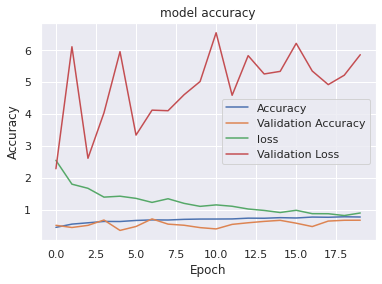

In [ ]:
history_summary(vgg19_2_history)

14/14 [==============================] - 2s 170ms/step
              precision    recall  f1-score   support

      Normal       0.38      1.00      0.55       160
    Katarakt       0.00      0.00      0.00       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.00      0.00      0.00       120

    accuracy                           0.38       426
   macro avg       0.09      0.25      0.14       426
weighted avg       0.14      0.38      0.21       426

[[160   0   0   0]
 [111   0   0   0]
 [ 35   0   0   0]
 [120   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


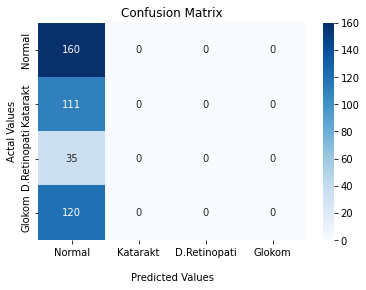

In [31]:
vgg19_2 = model_load("vgg19_2_224_224_3")
confusion_matrix_and_classification_report(vgg19_2)

### 3 - VGG19 - adam 

In [ ]:
vgg19_3 = vgg19()

vgg19_3.compile(optimizer= 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_3_history = vgg19_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
64/64 [==============================] - 18s 272ms/step - loss: 1.2617 - accuracy: 0.5684 - val_loss: 2.4087 - val_accuracy: 0.5527
Epoch 2/20
64/64 [==============================] - 15s 239ms/step - loss: 0.7366 - accuracy: 0.7031 - val_loss: 2.5302 - val_accuracy: 0.5156
Epoch 3/20
64/64 [==============================] - 17s 272ms/step - loss: 0.6335 - accuracy: 0.7520 - val_loss: 2.2456 - val_accuracy: 0.6113
Epoch 4/20
64/64 [==============================] - 15s 230ms/step - loss: 0.5892 - accuracy: 0.7695 - val_loss: 2.1982 - val_accuracy: 0.5371
Epoch 5/20
64/64 [==============================] - 15s 229ms/step - loss: 0.5631 - accuracy: 0.7842 - val_loss: 2.8500 - val_accuracy: 0.6680
Epoch 6/20
64/64 [==============================] - 17s 264ms/step - loss: 0.5628 - accuracy: 0.7837 - val_loss: 3.5555 - val_accuracy: 0.4785
Epoch 7/20
64/64 [==============================] - 15s 230ms/step - loss: 0.5173 - accuracy: 0.7974 - val_loss: 3.1074 - val_accuracy: 0.5625

In [ ]:
loss_15,accuracy_15 = vgg19_3.evaluate(X_test,y_test)

14/14 [==============================] - 3s 176ms/step - loss: 0.5277 - accuracy: 0.7911


In [ ]:
history_save("vgg19_3_history",vgg19_3_history)
model_save(vgg19_3,"vgg19_3_224_224_3")

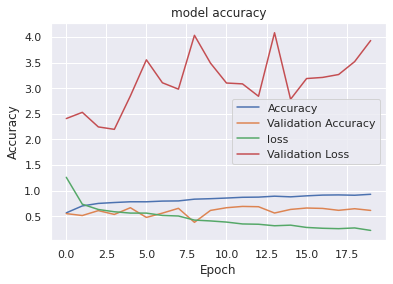

In [ ]:
history_summary(vgg19_3_history)

14/14 [==============================] - 3s 169ms/step
              precision    recall  f1-score   support

      Normal       0.68      0.87      0.77       160
    Katarakt       0.91      0.93      0.92       111
D.Retinopati       0.89      0.69      0.77        35
      Glokom       0.86      0.59      0.70       120

    accuracy                           0.79       426
   macro avg       0.84      0.77      0.79       426
weighted avg       0.81      0.79      0.79       426

[[139   8   2  11]
 [  7 103   0   1]
 [ 11   0  24   0]
 [ 46   2   1  71]] 



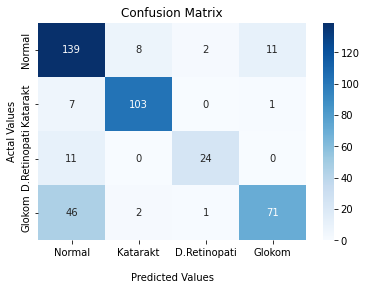

In [32]:
vgg19_3 = model_load("vgg19_3_224_224_3")
confusion_matrix_and_classification_report(vgg19_3)

### 4 - VGG19 - ADADELTA

In [ ]:
vgg19_4 = vgg19()

vgg19_4.compile(optimizer= optimizers.Adadelta(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_4_history = vgg19_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/20
64/64 [==============================] - 29s 225ms/step - loss: 1.3953 - accuracy: 0.2729 - val_loss: 1.7344 - val_accuracy: 0.1758
Epoch 2/20
64/64 [==============================] - 14s 218ms/step - loss: 1.3660 - accuracy: 0.3018 - val_loss: 1.7098 - val_accuracy: 0.1211
Epoch 3/20
64/64 [==============================] - 16s 258ms/step - loss: 1.3491 - accuracy: 0.3354 - val_loss: 1.6754 - val_accuracy: 0.1113
Epoch 4/20
64/64 [==============================] - 17s 262ms/step - loss: 1.3357 - accuracy: 0.3730 - val_loss: 1.6537 - val_accuracy: 0.1035
Epoch 5/20
64/64 [==============================] - 17s 264ms/step - loss: 1.3234 - accuracy: 0.3970 - val_loss: 1.6324 - val_accuracy: 0.0996
Epoch 6/20
64/64 [==============================] - 17s 270ms/step - loss: 1.3117 - accuracy: 0.4175 - val_loss: 1.6096 - val_accuracy: 0.0996
Epoch 7/20
64/64 [==============================] - 18s 277ms/step - loss: 1.

In [ ]:
loss_16,accuracy_16 = vgg19_4.evaluate(X_test,y_test)

14/14 [==============================] - 4s 275ms/step - loss: 1.1872 - accuracy: 0.5563


In [ ]:
history_save("vgg19_4_history",vgg19_4_history)
model_save(vgg19_4,"vgg19_4_224_224_3")

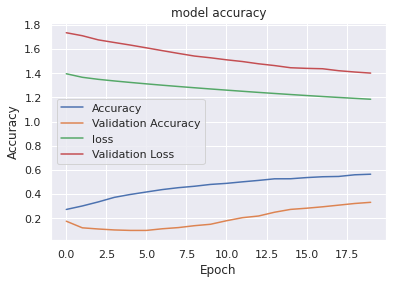

In [ ]:
history_summary(vgg19_4_history)

14/14 [==============================] - 2s 170ms/step
              precision    recall  f1-score   support

      Normal       0.58      0.74      0.65       160
    Katarakt       0.53      0.93      0.67       111
D.Retinopati       0.00      0.00      0.00        35
      Glokom       0.55      0.13      0.21       120

    accuracy                           0.56       426
   macro avg       0.42      0.45      0.38       426
weighted avg       0.51      0.56      0.48       426

[[118  32   0  10]
 [  5 103   0   3]
 [ 21  14   0   0]
 [ 58  46   0  16]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


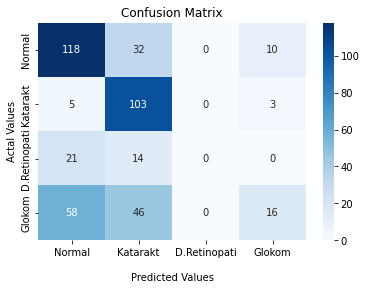

In [33]:
vgg19_4 = model_load("vgg19_4_224_224_3")
confusion_matrix_and_classification_report(vgg19_4)

### 5 - VGG19 - Adagrad

In [ ]:
vgg19_5 = vgg19()

vgg19_5.compile(optimizer= optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_5_history = vgg19_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 3s 0us/step
Epoch 1/20
64/64 [==============================] - 17s 223ms/step - loss: 1.2444 - accuracy: 0.4639 - val_loss: 1.3197 - val_accuracy: 0.4941
Epoch 2/20
64/64 [==============================] - 16s 255ms/step - loss: 1.0080 - accuracy: 0.6089 - val_loss: 1.3899 - val_accuracy: 0.4805
Epoch 3/20
64/64 [==============================] - 14s 218ms/step - loss: 0.9344 - accuracy: 0.6489 - val_loss: 1.4383 - val_accuracy: 0.4668
Epoch 4/20
64/64 [==============================] - 14s 219ms/step - loss: 0.8915 - accuracy: 0.6548 - val_loss: 1.4237 - val_accuracy: 0.4922
Epoch 5/20
64/64 [==============================] - 14s 220ms/step - loss: 0.8578 - accuracy: 0.6724 - val_loss: 1.5725 - val_accuracy: 0.4688
Epoch 6/20
64/64 [==============================] - 14s 220ms/step - loss: 0.8302 - accuracy: 0.6841 - val_loss: 1.5861 - val_accuracy: 0.4590
Epoch 7/20
64/64 [==============================] - 16s 257ms/step - loss: 0.

In [ ]:
loss_17,accuracy_17 = vgg19_5.evaluate(X_test,y_test)

14/14 [==============================] - 4s 260ms/step - loss: 0.8034 - accuracy: 0.6831


In [ ]:
history_save("vgg19_5_history",vgg19_5_history)
model_save(vgg19_5,"vgg19_5_224_224_3")

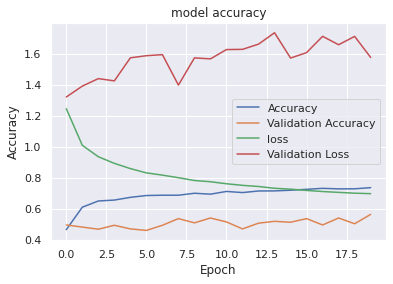

In [ ]:
history_summary(vgg19_5_history)

14/14 [==============================] - 2s 170ms/step
              precision    recall  f1-score   support

      Normal       0.68      0.67      0.68       160
    Katarakt       0.77      0.93      0.84       111
D.Retinopati       0.50      0.09      0.15        35
      Glokom       0.60      0.65      0.63       120

    accuracy                           0.68       426
   macro avg       0.64      0.58      0.57       426
weighted avg       0.67      0.68      0.66       426

[[107  14   2  37]
 [  5 103   0   3]
 [ 18   3   3  11]
 [ 27  14   1  78]] 



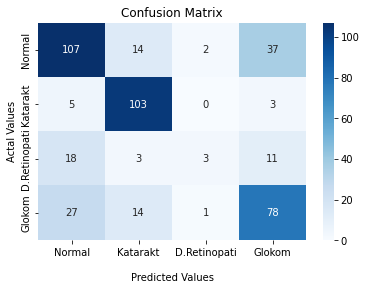

In [34]:
vgg19_5 = model_load("vgg19_5_224_224_3")
confusion_matrix_and_classification_report(vgg19_5)

# Modellerin Karşılaştırılması

In [ ]:
def degerlendirme(model,X,y):
  return model.evaluate(X,y)

In [ ]:
alexnet_1 = model_load("alexnet_1_224_224_3") # SGD
alexnet_6 = model_load("alexnet_6_224_224_3") # Adagrad
alexnet_2 = model_load("alexnet_2_224_224_3") # RMSprop
alexnet_5 = model_load("alexnet_5_224_224_3") #Adadelta
alexnet_3 = model_load("alexnet_3_224_224_3") # Adam

resnet_1 = model_load("resnet_1_224_224_3") # SGD
resnet_5 = model_load("resnet_5_224_224_3") # Adagrad
resnet_2 = model_load("resnet_2_224_224_3") # RMSprop
resnet_4 = model_load("resnet_4_224_224_3") # Adadelta
resnet_3 = model_load("resnet_3_224_224_3") # Adam


In [ ]:
# Test verisi için doğruluk yuzdesi hesaplama

alexnet_eva_1 = round(degerlendirme(alexnet_1,X_test,y_test)[1],4)
alexnet_eva_6 = round(degerlendirme(alexnet_6,X_test,y_test)[1],4)
alexnet_eva_2 = round(degerlendirme(alexnet_2,X_test,y_test)[1],4)
alexnet_eva_5 = round(degerlendirme(alexnet_5,X_test,y_test)[1],4)
alexnet_eva_3 = round(degerlendirme(alexnet_3,X_test,y_test)[1],4)


32/32 [==============================] - 1s 29ms/step - loss: 0.9092 - accuracy: 0.6038


In [ ]:
resnet_eva_1 = round(degerlendirme(resnet_1,X_test,y_test)[1],4)
resnet_eva_5 = round(degerlendirme(resnet_5,X_test,y_test)[1],4)
resnet_eva_2 = round(degerlendirme(resnet_2,X_test,y_test)[1],4)
resnet_eva_4 = round(degerlendirme(resnet_4,X_test,y_test)[1],4)
resnet_eva_3 = round(degerlendirme(resnet_3,X_test,y_test)[1],4)

32/32 [==============================] - 8s 202ms/step - loss: 0.9418 - accuracy: 0.6077


In [ ]:
data = [[alexnet_eva_1,alexnet_eva_6,alexnet_eva_2,alexnet_eva_5,alexnet_eva_3],
                [resnet_eva_1,resnet_eva_5,resnet_eva_2,resnet_eva_4,resnet_eva_3]]
                
data

[[0.5988, 0.6146, 0.6057, 0.5949, 0.6038],
 [0.6028, 0.5998, 0.3715, 0.6008, 0.6077]]

In [ ]:
columns =  ['SGD', 'Adagrad', 'RMSprop','Adadelta','Adam']

print("Test verisi için acc değerlerinin model özeti\n")
sonuc = pd.DataFrame(data=data, index = ['AlexNet','ResNet50'], columns = columns)
sonuc

Test verisi için acc değerlerinin model özeti



,SGD,Adagrad,RMSprop,Adadelta,Adam
AlexNet,0.5988,0.6146,0.6057,0.5949,0.6038
ResNet50,0.6028,0.5998,0.3715,0.6008,0.6077
